In [55]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [56]:
# read the files
data = pd.read_csv('../Churn_Modelling.csv')

In [ ]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

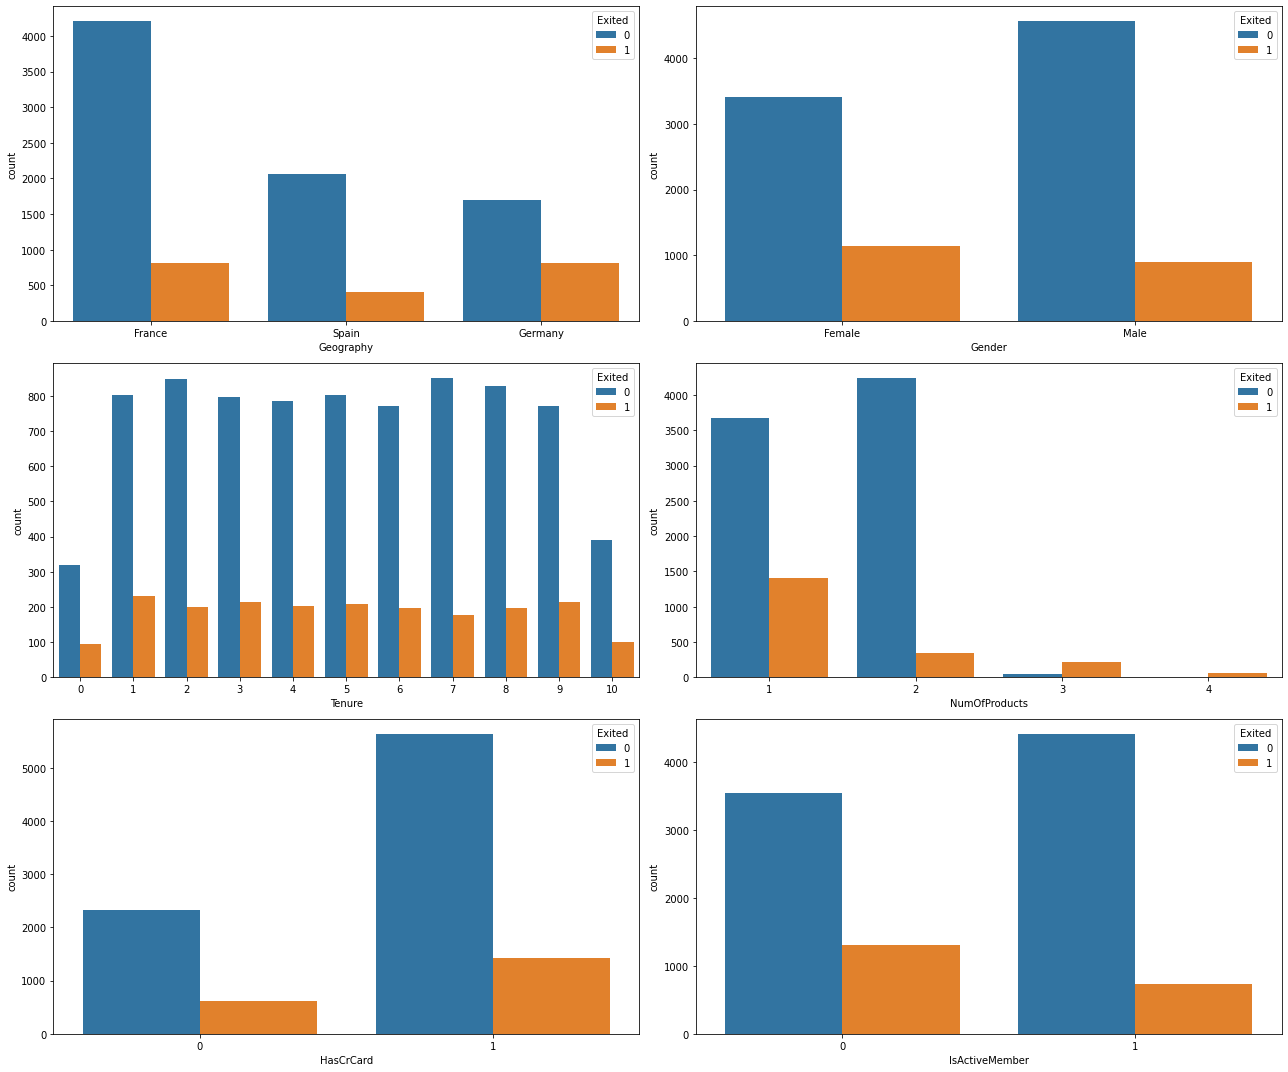

In [ ]:
# visualizing categorical variables

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = data, ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = data, ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = data, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = data, ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = data, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = data, ax = ax[2][1])

plt.tight_layout()
plt.show()

### pre-processsing

In [ ]:
# check for missing values
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
# dropping useless columns 

data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# Encoding categorical variables

data['Geography'] = data['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})

In [ ]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from tensorflow.keras.utils import to_categorical

x = data.drop('Exited', axis = 1)
y = to_categorical(data.Exited)

In [ ]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

FFNN

In [ ]:
#Creating Independent Vector
X = data.iloc[:, 3:-1].values
#Creating Dependent Vector
y = data.iloc[:, -1].values

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
ann = Sequential()

# adding the input layer
ann.add(Dense(10, input_shape = (10, )))

# add the first hidden layer
ann.add(Dense(10, kernel_initializer = 'normal', activation = 'relu',))

#dropout & batch normalization
ann.add(Dropout(rate = 0.1))
ann.add(BatchNormalization())

#output layer
ann.add(tf.keras.layers.Dense(units= 2, activation='sigmoid'))

ann.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics= ['accuracy'])
ann_history = ann.fit(x_train, y_train, batch_size= 32, epochs= 50, validation_split= 0.3)

Epoch 1/50
175/175 [==============================] - 2s 6ms/step - loss: 0.5950 - accuracy: 0.6930 - val_loss: 0.5156 - val_accuracy: 0.7958
Epoch 2/50
175/175 [==============================] - 2s 11ms/step - loss: 0.4616 - accuracy: 0.8066 - val_loss: 0.4493 - val_accuracy: 0.7971
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4215 - accuracy: 0.8223 - val_loss: 0.4179 - val_accuracy: 0.8192
Epoch 4/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8339 - val_loss: 0.4103 - val_accuracy: 0.8275
Epoch 5/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8413 - val_loss: 0.3997 - val_accuracy: 0.8333
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8377 - val_loss: 0.3928 - val_accuracy: 0.8367
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8357 - val_loss: 0.3804 - val_accuracy: 0.8400
Epoch

In [ ]:
y_pred = ann.predict(x_test)

In [ ]:
# Predicting the Test set results
y_pred = ann.predict(x_test)
for i in range(0, y_pred.size):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

63/63 [==============================] - 0s 1ms/step
[[1542   53]
 [ 230  175]]


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
report = classification_report(y_test, y_pred)
print("The Classification report is as follows::\n", report)

The Classification report is as follows::
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.77      0.43      0.55       405

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



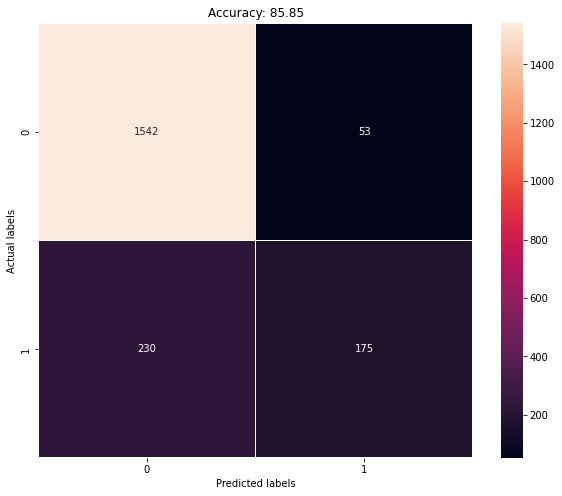

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = '.0f', linewidths = .5, square = True)
plt.xlabel('Predicted labels')
plt.title('Accuracy: {0}'.format(round(accuracy, 2)))
plt.ylabel('Actual labels')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


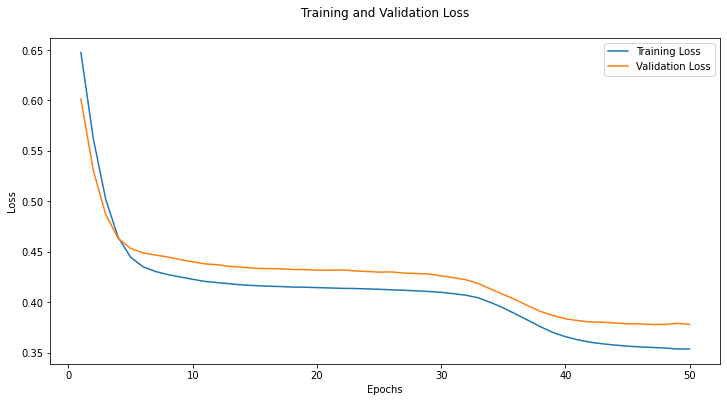

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = ann_history.history['loss']
val_loss = ann_history.history['val_loss'] 
epoch = range(1, 51)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


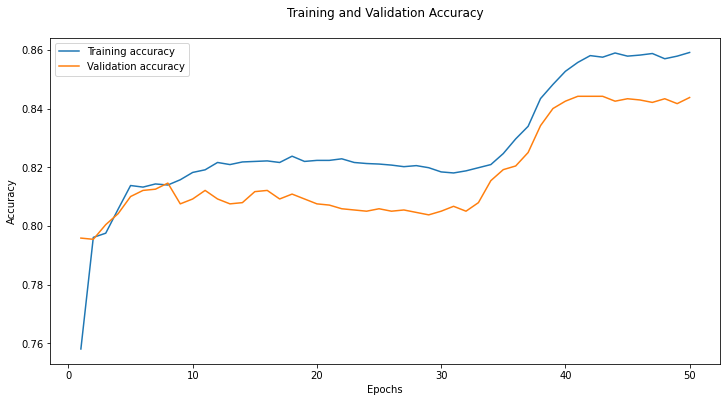

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = ann_history.history['accuracy']
val_loss = ann_history.history['val_accuracy'] 
epoch = range(1, 51)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
acc = ann.evaluate(x_test, y_test)[1]

print(f'Accuracy of model is {acc}')

63/63 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8580
Accuracy of model is 0.8579999804496765


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Builing the function
def ann_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(10, input_shape = (10, )))
    ann.add(Dense(10, kernel_initializer = 'normal', activation = 'relu',))
    ann.add(Dense(8, kernel_initializer = 'normal', activation = 'relu',))
    ann.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
    ann.add(Dropout(rate = 0.1))
    ann.add(BatchNormalization())
    ann.add(Dense(4, kernel_initializer = 'he_uniform',activation='relu'))
    ann.add(Dense(2, kernel_initializer = 'he_uniform',activation='relu')) 
    ann.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))
    ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
# Passing values to KerasClassifier 
model = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 50)
# We are using 5 fold cross validation here
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


200/200 [==============================] - 1s 3ms/step - loss: 0.5573 - accuracy: 0.7841
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4461 - accuracy: 0.7983
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8094
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3859 - accuracy: 0.8316
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3748 - accuracy: 0.8402
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8447
Epoch 7/50
200/200 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8481
Epoch 8/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3656 - accuracy: 0.8483
Epoch 9/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8487
Epoch 10/50
200/200 [==============================] - 1s 2ms/step - loss: 0.3597 - accuracy: 0.8520
Epoch 11/5

In [ ]:
# Checking the mean and standard deviation of the accuracies obtained
mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean*100))

Accuracy: 85.35 %
Standard Deviation: 0.32 %


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.layers import BatchNormalization

# Builing the function

def ann_classifier( optimizer='adam'):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(10, input_shape = (10, )))
    ann.add(Dense(10, kernel_initializer = 'normal', activation = 'relu',))
    ann.add(Dense(8, kernel_initializer = 'normal', activation = 'relu',))
    ann.add(Dense(6, kernel_initializer = 'normal',activation='relu'))
    ann.add(Dropout(rate = 0.1))
    ann.add(BatchNormalization())
    ann.add(Dense(4, kernel_initializer = 'normal',activation='relu'))
    ann.add(Dense(2, kernel_initializer = 'normal',activation='relu')) 
    ann.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))
    ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann

In [ ]:
# Passing values to KerasClassifier 
ann = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
# Using Grid Search CV to getting the best parameters
parameters = {'batch_size': [25, 32],
        'epochs': [50, 100],
        'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = ann, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

grid_search.fit(x_train, y_train)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  category=UserWarning,


320/320 [==============================] - 2s 2ms/step - loss: 0.4922 - accuracy: 0.7959
Epoch 2/50
320/320 [==============================] - 1s 2ms/step - loss: 0.4367 - accuracy: 0.7960
Epoch 3/50
320/320 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.7962
Epoch 4/50
320/320 [==============================] - 1s 2ms/step - loss: 0.4010 - accuracy: 0.8284
Epoch 5/50
320/320 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8341
Epoch 6/50
320/320 [==============================] - 1s 2ms/step - loss: 0.3902 - accuracy: 0.8409
Epoch 7/50
320/320 [==============================] - 1s 2ms/step - loss: 0.3822 - accuracy: 0.8431
Epoch 8/50
320/320 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8481
Epoch 9/50
320/320 [==============================] - 1s 2ms/step - loss: 0.3738 - accuracy: 0.8496
Epoch 10/50
320/320 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8535
Epoch 11/5

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9ddd90e450>,
             n_jobs=-1,
             param_grid={'batch_size': [25, 32], 'epochs': [50, 100],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: nan %
Best Parameters: {'batch_size': 25, 'epochs': 50, 'optimizer': 'adam'}


In [65]:
# defining the layers
from keras.wrappers.scikit_learn import KerasClassifier
model_tunned = Sequential()
model_tunned.add(Dense(10, input_shape = (10, )))
model_tunned.add(Dense(10, kernel_initializer = 'normal', activation = 'relu',))
model_tunned.add(Dense(8, kernel_initializer = 'normal', activation = 'relu'))
model_tunned.add(Dense(6, kernel_initializer = 'normal',activation='relu'))
model_tunned.add(Dropout(rate = 0.1))
model_tunned.add(BatchNormalization())
model_tunned.add(Dense(4, kernel_initializer = 'normal',activation='relu'))
model_tunned.add(Dense(2, kernel_initializer = 'normal',activation='relu'))
model_tunned.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
model_tunned.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
anntunned_history =model_tunned.fit(x_train, y_train, batch_size= 25, epochs= 50, validation_split= 0.3)


Epoch 1/50
224/224 [==============================] - 3s 5ms/step - loss: 0.5186 - accuracy: 0.7948 - val_loss: 0.4999 - val_accuracy: 0.7958
Epoch 2/50
224/224 [==============================] - 1s 4ms/step - loss: 0.4231 - accuracy: 0.7961 - val_loss: 0.4381 - val_accuracy: 0.7958
Epoch 3/50
224/224 [==============================] - 1s 4ms/step - loss: 0.4076 - accuracy: 0.7961 - val_loss: 0.3977 - val_accuracy: 0.7958
Epoch 4/50
224/224 [==============================] - 1s 4ms/step - loss: 0.3957 - accuracy: 0.8037 - val_loss: 0.3957 - val_accuracy: 0.8454
Epoch 5/50
224/224 [==============================] - 1s 4ms/step - loss: 0.3906 - accuracy: 0.8427 - val_loss: 0.3962 - val_accuracy: 0.8375
Epoch 6/50
224/224 [==============================] - 1s 4ms/step - loss: 0.3851 - accuracy: 0.8395 - val_loss: 0.3874 - val_accuracy: 0.8421
Epoch 7/50
224/224 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8487 - val_loss: 0.3808 - val_accuracy: 0.8483
Epoch 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


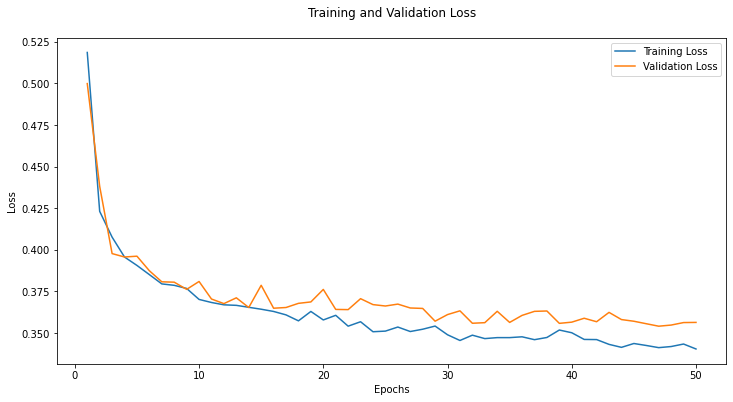

In [66]:
plt.figure(figsize = (12, 6))

train_loss = anntunned_history.history['loss']
val_loss = anntunned_history.history['val_loss'] 
epoch = range(1, 51)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


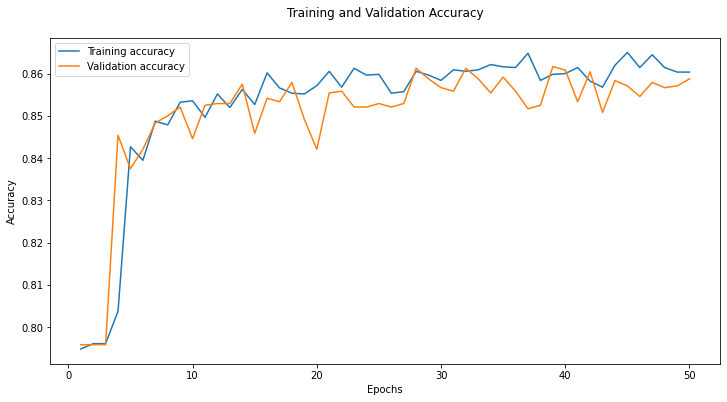

In [67]:
plt.figure(figsize = (12, 6))

train_loss = anntunned_history.history['accuracy']
val_loss = anntunned_history.history['val_accuracy'] 
epoch = range(1,51)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
# Predicting the Test set results
y_pred = model_tunned.predict(x_test)
y_pred = (y_pred > 0.5)
# Calculate the Accuracy
accuracy = accuracy_score(y_pred,y_test)

63/63 [==============================] - 0s 4ms/step


In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1535   60]
 [ 207  198]]


In [70]:
print('Accuracy after tuning the FFNN:', (accuracy)*100,'%')

Accuracy after tuning the FFNN: 86.65 %


In [71]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
report = classification_report(y_test, y_pred)
print("The Classification report is as follows::\n", report)

The Classification report is as follows::
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.77      0.49      0.60       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



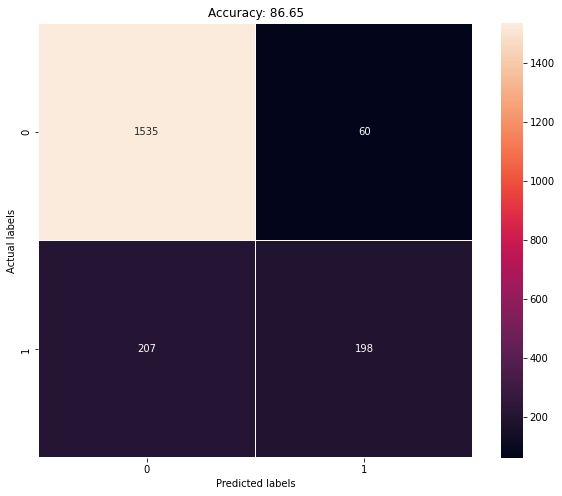

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = '.0f', linewidths = .5, square = True)
plt.xlabel('Predicted labels')
plt.title('Accuracy: {0}'.format(round(accuracy, 2)))
plt.ylabel('Actual labels')
plt.show()